This is text from a Jupyter Notebook

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection as ms
%matplotlib inline
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


In [48]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = ms.train_test_split(X, y)
Xreg = X[50:, np.newaxis,0]
yreg = X[50:, 2]

# Linear Regression

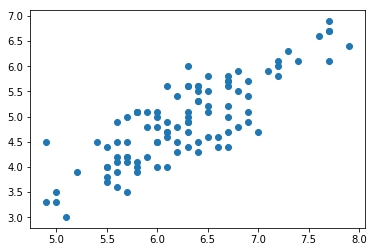

In [35]:
plt.scatter(X[50:, 0 ], X[50:, 2], )


### OLE
old school linear regression, vulnerable to colinearity. This issue is adressed with ridge reg

0.68637689332401108

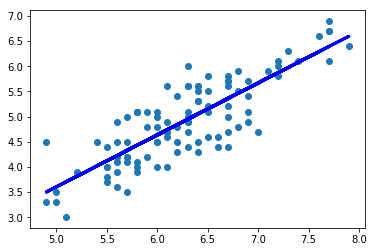

In [49]:
OLE = linear_model.LinearRegression()
OLE.fit(Xreg, yreg)
y_pred2 = OLE.predict(Xreg)
plt.scatter(X[50:, 0 ], X[50:, 2])
plt.plot(Xreg, y_pred2, color='blue', linewidth=3)
OLE.score(Xreg, yreg)


### Ridge
Used to ameliorate the effects of colinearity. Uses shrinkage of coefficient terms to prefer smaller coeffs.
Uses L2 Regularization

0.68637328190952029

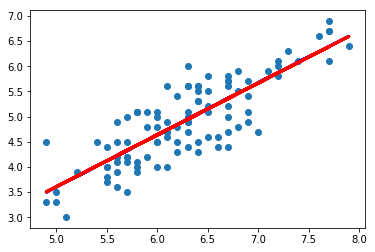

In [38]:
ridge = linear_model.RidgeCV()
ridge.fit(Xreg, yreg)
y_pred3 = ridge.predict(Xreg)
plt.scatter(X[50:, 0 ], X[50:, 2])
plt.plot(Xreg, y_pred2, color='blue', linewidth=3)
plt.plot(Xreg, y_pred3, color='red', linewidth=3)
ridge.score(Xreg, yreg)


### Lasso
Regression that includes feature selection. Picks a few features to use and prefers coefficients that are close to zero
Uses L1 regularization

0.68637620694711776

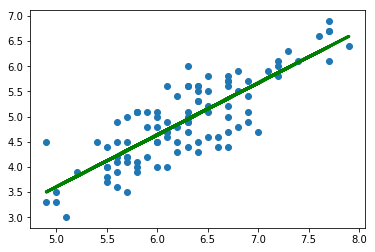

In [39]:
lasso = linear_model.LassoCV()
lasso.fit(Xreg, yreg)
y_pred4 = lasso.predict(Xreg)
y_pred3 = ridge.predict(Xreg)
plt.scatter(X[50:, 0 ], X[50:, 2])
plt.plot(Xreg, y_pred4, color = "green", linewidth = 3)
lasso.score(Xreg, yreg)



### Elastic Net Regression
Good for when you want to use lasso but there may be issues of multicolinearity. Uses L1 and L2 

0.6863740653953887

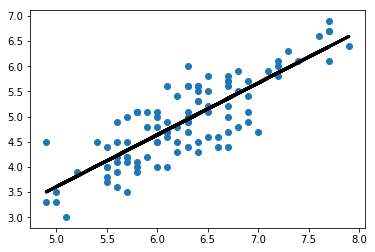

In [40]:
elast = linear_model.ElasticNetCV()
elast.fit(Xreg, yreg)
y_pred5 = elast.predict(Xreg)
y_pred3 = ridge.predict(Xreg)
plt.scatter(X[50:, 0 ], X[50:, 2])
plt.plot(Xreg, y_pred5, color='black', linewidth=3)
elast.score(Xreg, yreg)


## Linear Logistic Classifiers


### Logistic Regression
useful for possible outcomes

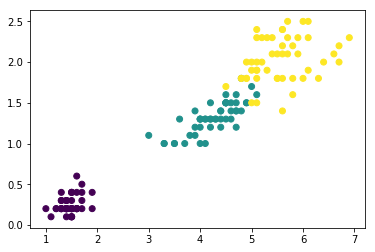

In [50]:
plt.scatter(X[:,2],X[:,3], c = iris.target)

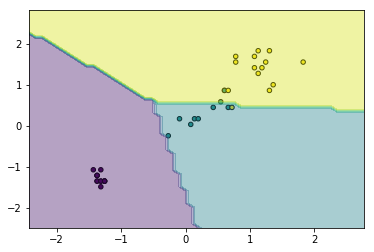

0.92105263157894735

In [142]:
from VisualFuncs import Visual_Dec_Regions
logreg = linear_model.LogisticRegression()
logreg.fit(X_train[:,[2,3]], y_train)
y_class = logreg.predict(X_test[:,[2,3]])
Visual_Dec_Regions([2,3], X_test, y_test, logreg)
metrics.accuracy_score(y_test, y_class)

### Perceptron
updates weights to create a hyperplane segregating the data. Must be linearly seperable to work.
SCALE DATA

C:\Users\Harrison\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


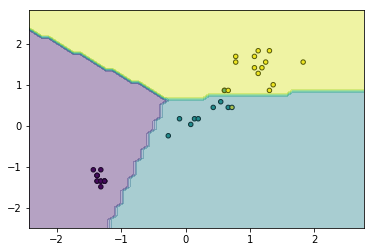

0.94736842105263153

In [143]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[:,[2,3]])
XX_train = scaler.transform(X_train[:, [2,3]])
XX_test = scaler.transform(X_test[:, [2,3]])

percep = linear_model.Perceptron()
percep.fit(XX_train, y_train)
y_class3 = percep.predict(XX_test)
Visual_Dec_Regions([0,1], XX_test, y_test, percep)
metrics.accuracy_score(y_test, y_class3)

### SGD Classifier
Vulnerable to feature scaling use preprocessing

C:\Users\Harrison\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


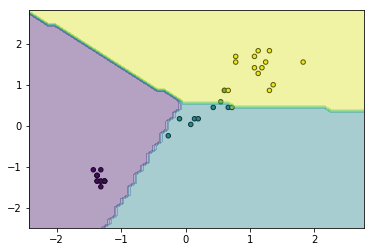

0.92105263157894735

In [144]:
SGD = linear_model.SGDClassifier()
SGD.fit(XX_train, y_train)
y_class3 = SGD.predict(XX_test)
Visual_Dec_Regions([0,1], XX_test, y_test, SGD)
metrics.accuracy_score(y_test, y_class3)

# Linear and Quadratic Discriminant Analysis


### Linear Discriminant Analysis As Dimension Reduction Technique
Classifier with Linear decision boundary, Fits a Gaussian Dansity to a class and makes a judgement on where the decision boundary whould be placed. Can be used for Dim Reduction with the n_components variable where n_components is less than the number of classifiers.

Assumptions: -each class has a normal distibution (bell shape)
             -features are independent and have a similar covariance
             
 However the LDA for dim reduction works reasonably well when these assumptions are violated

http://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Data_Compresssion_via_Dimensionality_Reduction_2_Linear_Discriminant_Analysis.php

Essentially finds a hyperplane to project your data onto that maximizes the distance between each classes mean vector (ie mean value for all features)

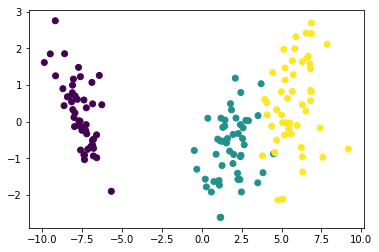

In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
sklearn_lda = LinearDiscriminantAnalysis(n_components = 2)
X_lda_transformed = sklearn_lda.fit_transform(X, y)
plt.scatter(X_lda_transformed[:,0], X_lda_transformed[:,1], c =y)

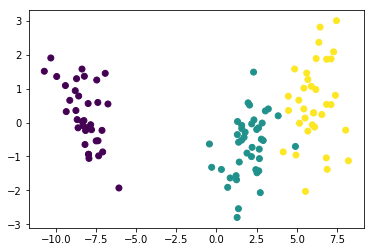

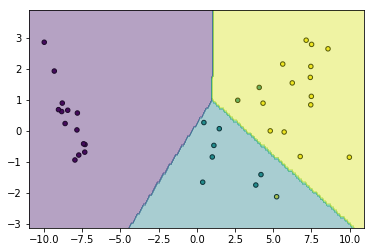

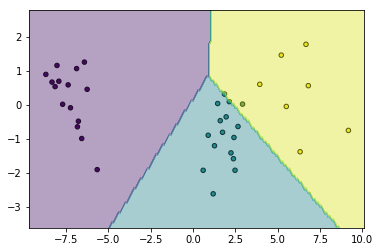

LDA + logreg accuracy w/regularization: 0.921052631579
LDA + logreg accuracy w/out regularization: 0.947368421053
versus the old score of: 0.921052631579


In [145]:
#must scale data 
ldascaler = StandardScaler()
ldascaler.fit(X_train)
ldaXX_train = ldascaler.transform(X_train)
ldaXX_test = ldascaler.transform(X_test)


#import LDA and project the iris dataset to 2D with classes seperated as much as possible
lda = LinearDiscriminantAnalysis(n_components = 2)
X_trans = lda.fit_transform(ldaXX_train, y_train)
X_trans_test = lda.transform(ldaXX_test)
f1 = plt.figure()
ax1 = f1.add_subplot(111)
ax1.scatter(X_trans[:,0], X_trans[:,1], c = y_train)


# with logreg
ldalogreg = linear_model.LogisticRegression()
ldalogreg.fit(X_trans, y_train)
lday_class = ldalogreg.predict(X_trans_test)
Visual_Dec_Regions([0,1], X_trans_test, y_test, ldalogreg)


X_lda_train, X_lda_test, y_lda_train, y_lda_test = ms.train_test_split(X_lda_transformed, y)

#Logreg without scaling
ldalogreg2 = linear_model.LogisticRegression()
ldalogreg2.fit(X_lda_train, y_lda_train)
lday_class2 = ldalogreg2.predict(X_lda_test)
Visual_Dec_Regions([0,1], X_lda_test, y_lda_test, ldalogreg2)
print('LDA + logreg accuracy w/regularization:', metrics.accuracy_score(y_test, lday_class))
print('LDA + logreg accuracy w/out regularization:', metrics.accuracy_score(y_lda_test, lday_class2))
print('versus the old score of:', metrics.accuracy_score(y_test, y_class))


As seen above the most effective way to use LDA is as follows:
1. initialize the LDA class and fit transform the entire dataset.
2. train test split the transformed data set
3. Train classifier on transformed training set



## Hold Up, New Topic
Because We are having issues understanding when to scale/ regularize data we are now moving towards a review of Preprocessing with in SKLEARN.

# Data Preprocessing
Because some models require standardization to provide more robust outcomes, Preprocessing should be your first step after data acquisition

## Estimating- Missing Values in Data via Interpolation


Resources:
http://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Data_Preprocessing-Missing-Data-Categorical-Data.php


### Mean Intrepolation
replace missing values with the mean value of the entire feature column. Reduces the variability of the data. Might not be a good idea for classification where classes are linearly seperable. Other strategies could be median or most_frequent.

In [ ]:
"""
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values ='NaN', strategy = 'mean', axis = 0)
imputer.fit(X)
imputed_X = imputer.transform(X)

"""

The Imputer is a member of the transformer class that generally use the methods
1. .fit()
2. .transform()
3. .fit_transform()

Transfromer fit on the training data is ued to traansform training and test dataset

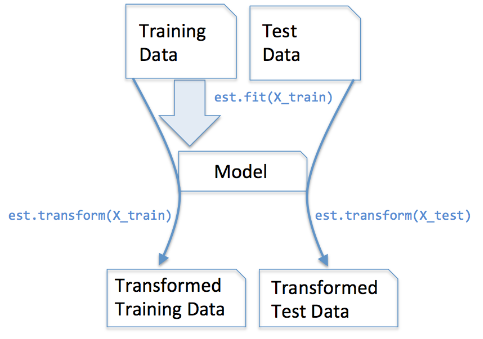

## Standardization (Mean Removal / Variance Scaling)
Comes in the sklearn.preprocessing.
Generally ML algorithms benefit from standardization of data. Take note of when your data has outliers  and do research on how to ameliorate the effect on your models predictions.

Standardized data will look more normally distributed: Gaussian with zero mean and unit variance. Comes down to subtracting the mean from each feature vector and dividing feature vectors by their standard deviation.

Without this standardization features with larger variance might dominate the thought attention of ML aglorithms at the expense of other features

Sklearn.preprocessing.StandardScaler()
creates a transformer that calculates mean and st dev on a training set during the fit method calc, which can be applied to testing data later with transform method

([array([  0.,   0.,   0.,   0.,   0.,   8.,  30.,  42.,  24.,   8.]),
  array([  0.,   0.,   8.,  77.,  25.,   2.,   0.,   0.,   0.,   0.]),
  array([  0.,  29.,   3.,   1.,   9.,  26.,  24.,  16.,   4.,   0.]),
  array([ 32.,  40.,  39.,   1.,   0.,   0.,   0.,   0.,   0.,   0.])],
 array([ 0.1 ,  0.88,  1.66,  2.44,  3.22,  4.  ,  4.78,  5.56,  6.34,
         7.12,  7.9 ]),
 <a list of 4 Lists of Patches objects>)

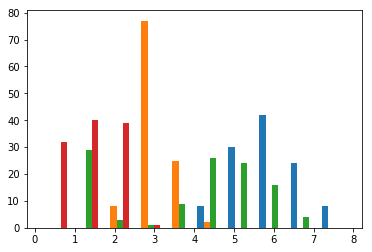

In [147]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = ms.train_test_split(X, y)
plt.hist(X_train)

([array([  0.,  12.,  18.,  22.,  20.,  23.,   9.,   4.,   4.,   0.]),
  array([  3.,   5.,  15.,  20.,  42.,  13.,   6.,   6.,   0.,   2.]),
  array([  0.,  29.,   3.,   5.,  26.,  35.,  12.,   2.,   0.,   0.]),
  array([  0.,  21.,  11.,   9.,  28.,  24.,  18.,   1.,   0.,   0.])],
 array([-2.52422599, -1.93472821, -1.34523043, -0.75573265, -0.16623487,
         0.42326292,  1.0127607 ,  1.60225848,  2.19175626,  2.78125405,
         3.37075183]),
 <a list of 4 Lists of Patches objects>)

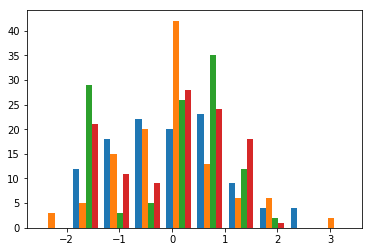

In [148]:
Scaler = StandardScaler()
Scaler.fit(X_train)
X_train = Scaler.transform(X_train)
X_test = Scaler.transform(X_test)
plt.hist(X_train)

RobustScler() can be used to scale your data in the face of outliers

### Loading the Titanic Data Set

In [3]:
titanic = pd.read_csv('titanic_train.csv')
del titanic['Name']
del titanic['Cabin']
del titanic['Ticket']
titanic = titanic.set_index('PassengerId')
titanic = titanic.fillna('0')
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22,1,0,7.2500,S
2,1,1,female,38,1,0,71.2833,C
3,1,3,female,26,0,0,7.9250,S
4,1,1,female,35,1,0,53.1000,S
5,0,3,male,35,0,0,8.0500,S


## Converting Categorical Values to Integers

### preprocessing.OneHotEncoder vs preprocessing.LabelEncoder
used to convert categorical variables to integers (one of k scheme)

Each categorical feature value is encoded as a vector of length k of k-1 0's and one 1. Essentially mapping k possible cateorical variables to a k dimensional space. 

In [4]:


titanicdumm = pd.get_dummies(titanic)
titanicdumm.head()

,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Age_0.42,Age_0.67,Age_0.75,...,Age_70.0,Age_70.5,Age_71.0,Age_74.0,Age_80.0,Age_0,Embarked_0,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,1,0,7.2500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1,1,0,71.2833,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,3,0,0,7.9250,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,1,0,53.1000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,3,0,0,8.0500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


We use LabelEncoder to convert categorical variables to integers within columns, for this to be useful to certain types of MachL algorithms we need vectors, we will have to use a onehotencoder to make each integer into a vector

In [153]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le = LabelEncoder()
titanic.Sex = le.fit_transform(titanic.Sex)
titanic.Embarked = le.fit_transform(titanic.Embarked)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22,1,0,7.2500,3
2,1,1,0,38,1,0,71.2833,1
3,1,3,0,26,0,0,7.9250,3
4,1,1,0,35,1,0,53.1000,3
5,0,3,1,35,0,0,8.0500,3


https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/

http://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features

http://scikit-learn.org/stable/modules/preprocessing_targets.html



In [156]:
ohe = OneHotEncoder()
titanic = ohe.fit_transform(titanic)
titanic.head()

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.